## TERCER PARCIAL DOSIMETRÍA DE RADIACIONES: BRAQUITERAPIA

**Nombre:** Samuel Cortes Salazar \\
**Fecha:** 5 de marzo de 2025

Los datos tabulados en el presente código fueron extraídos de las tablas suministradas por la AAPM para la fuente de referencia **Amerisham 6711**: \\
https://physics.carleton.ca/clrp/egs_brachy/seed_database/I125/OncoSeed_6711

LIBRERÍAS:

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, RectBivariateSpline

PARÁMETROS:

In [25]:
SK = 1.0  # Fuerza de aire-kerma - U
Lambda = 0.932 # Constante de tasa de dosis - cGy/h/U
L = 0.28  # Longitud activa - cm
r0 = 1.0  # Punto de referencia - 1 cm
theta0 = np.deg2rad(90)  # Ángulo de referencia - 90°

FUNCIÓN DE ANISOTROPÍA BIDIMENSIONAL:

In [26]:
r_F_tab = np.array([0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0])
theta_F_tab = np.array([0, 1, 2, 3, 5, 7, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 73, 75, 78, 80, 82, 84, 85, 86, 87, 88, 89, 90])
F_data = np.array([
    [0.172, 0.173, 0.175, 0.179, 0.203, 0.286, 0.375, 0.407, 0.523, 0.675, 0.771, 0.841, 0.891, 0.927, 0.952, 0.967, 0.961, 0.961, 0.973, 0.982, 0.987, 0.990, 0.994, 0.995, 0.997, 0.998, 0.999, 0.999, 0.999, 0.999, 1.000, 1.000, 1.000],  # r = 0.25 cm
    [0.209, 0.209, 0.210, 0.237, 0.343, 0.350, 0.369, 0.411, 0.488, 0.611, 0.713, 0.792, 0.846, 0.889, 0.923, 0.949, 0.970, 0.987, 0.999, 1.004, 0.996, 0.990, 0.993, 0.995, 0.997, 0.998, 0.999, 0.999, 0.999, 0.999, 1.000, 1.000, 1.000],  # r = 0.5 cm
    [0.253, 0.253, 0.272, 0.337, 0.394, 0.382, 0.415, 0.455, 0.522, 0.628, 0.718, 0.790, 0.847, 0.887, 0.920, 0.946, 0.968, 0.986, 0.999, 1.008, 1.011, 1.012, 1.006, 0.997, 0.998, 0.999, 0.999, 0.999, 0.999, 1.000, 1.000, 1.000, 1.000],  # r = 0.75 cm
    [0.289, 0.290, 0.334, 0.405, 0.420, 0.414, 0.449, 0.488, 0.550, 0.647, 0.728, 0.795, 0.849, 0.889, 0.920, 0.945, 0.967, 0.985, 0.999, 1.007, 1.012, 1.013, 1.014, 1.011, 1.000, 0.999, 0.999, 0.999, 1.000, 1.000, 1.000, 1.000, 1.000],  # r = 1.0 cm
    [0.387, 0.433, 0.475, 0.508, 0.497, 0.500, 0.535, 0.567, 0.617, 0.695, 0.761, 0.816, 0.861, 0.897, 0.925, 0.948, 0.968, 0.983, 0.996, 1.005, 1.009, 1.011, 1.013, 1.013, 1.013, 1.010, 1.010, 1.006, 1.002, 1.000, 1.000, 1.000, 1.000],  # r = 2.0 cm
    [0.454, 0.495, 0.546, 0.557, 0.542, 0.548, 0.582, 0.610, 0.654, 0.723, 0.780, 0.828, 0.869, 0.902, 0.927, 0.949, 0.967, 0.982, 0.993, 1.002, 1.006, 1.008, 1.010, 1.011, 1.011, 1.010, 1.010, 1.009, 1.006, 1.002, 1.000, 1.000, 1.000],  # r = 3.0 cm
    [0.497, 0.539, 0.582, 0.588, 0.574, 0.581, 0.612, 0.638, 0.678, 0.740, 0.793, 0.838, 0.875, 0.905, 0.930, 0.950, 0.967, 0.981, 0.992, 1.000, 1.003, 1.006, 1.008, 1.008, 1.010, 1.009, 1.008, 1.007, 1.004, 0.999, 0.999, 1.000, 1.000],  # r = 4.0 cm
    [0.531, 0.575, 0.610, 0.611, 0.602, 0.606, 0.636, 0.661, 0.698, 0.754, 0.804, 0.846, 0.880, 0.910, 0.933, 0.952, 0.969, 0.982, 0.992, 1.000, 1.003, 1.006, 1.008, 1.009, 1.010, 1.009, 1.009, 1.009, 1.008, 1.006, 1.003, 1.000, 1.000]   # r = 5.0 cm
])


FUNCIÓN DE DOSIS RADIAL:

In [27]:
r_tab = np.array([0.25, 0.5, 0.75, 1.0, 2.0, 3.0, 4.0, 5.0])
g_tab = np.array([1.094, 1.073, 1.040, 1.000, 0.815, 0.635, 0.483, 0.362])
g_interp = interp1d(r_tab, g_tab, kind='linear', fill_value="extrapolate")

FUNCIÓN GEOMÉTRICA:

In [28]:
def G(r, theta):
    sin_theta = np.sin(theta)
    sin_theta = np.where(np.abs(sin_theta) < 1e-6, 1e-6, sin_theta)
    term1 = (r * np.cos(theta) + L/2.0) / np.sqrt(r**2 + (L/2.0)**2 + r*L*np.cos(theta))
    term2 = (r * np.cos(theta) - L/2.0) / np.sqrt(r**2 + (L/2.0)**2 - r*L*np.cos(theta))
    return (1.0 / (r * sin_theta)) * (term1 - term2)

# FUNCIÓN GEOMÉTRICA EN LAS COORDENADAS DE REFERENCIA:
G_ref = G(r0, theta0)

CÁLCULO DE LA TASA DE DOSIS:

Tamaño de la tasa de dosis: (360, 100)


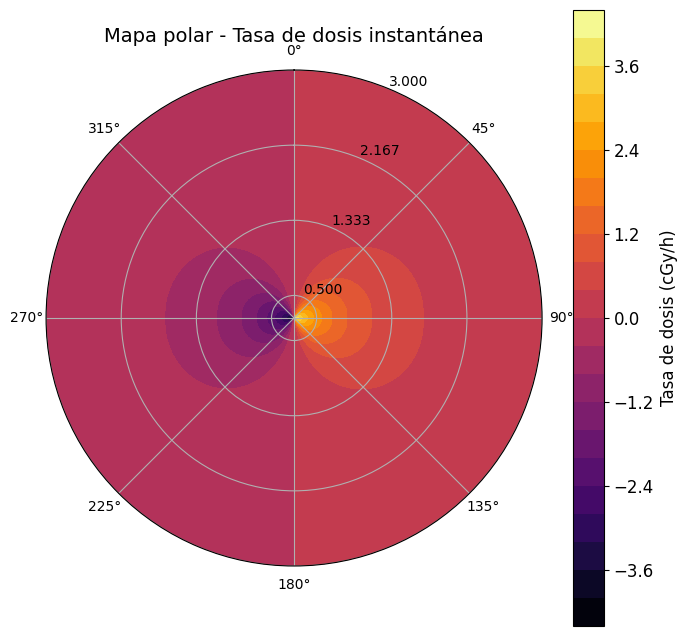

In [71]:
r_vals = np.linspace(0.25, 5.0, 100)
theta_vals_deg = np.linspace(0, 360, 360)
theta_vals_rad = np.deg2rad(theta_vals_deg)
R, Theta = np.meshgrid(r_vals, theta_vals_rad)
g_R = g_interp(R)
Theta_deg = np.rad2deg(Theta)
Theta_mod = np.mod(Theta_deg, 180)
Theta_mod = np.where(Theta_mod > 90, 180 - Theta_mod, Theta_mod)
F_R = F_data[3,-1]

G_R = G(R, Theta)
G_ratio = G_R / G_ref
Tasa = SK * Lambda * G_ratio * g_R * F_R  # en cGy/h
print("Tamaño de la tasa de dosis:", Tasa.shape)

fig1, ax1 = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
cf1 = ax1.contourf(Theta, R, DoseRate, levels=20, cmap='inferno')
cbar = fig1.colorbar(cf1, ax=ax1)
cbar.set_label(f'Tasa de dosis (cGy/h)', fontsize=12)
cbar.ax.tick_params(labelsize=12)
ax1.set_title('Mapa polar - Tasa de dosis instantánea', pad=20, fontsize=14)
ax1.set_rmax(3.0)
ax1.set_rticks(np.linspace(0.5, 3.0, 4))
ax1.set_theta_zero_location("N")
ax1.set_theta_direction(-1)
plt.show()

CÁLCULO DE LA DOSIS ACUMULADA:

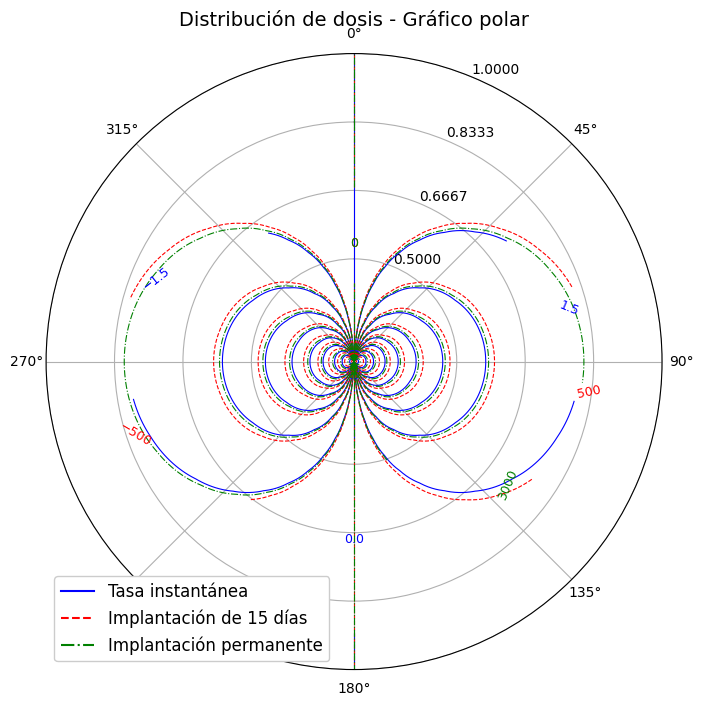

In [62]:
# DOSIS A 15 DÍAS DE IMPLANTACIÓN:
t_15 = 360  # horas (15 días)
Dosis_15 = Tasa * t_15
# DOSIS IMPLANTACIÓN PERMANENTE
T_medio = 59.4 * 24  # horas
Dosis_permanente = Tasa * (1.44 * T_medio)

fig2, ax2 = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
cf1 = ax2.contour(Theta, R, Tasa, levels=20, colors='blue', linewidths=0.8, linestyles='-')
cf2 = ax2.contour(Theta, R, Dosis_15, levels=20, colors='red', linewidths=0.8, linestyles='--')
cf3 = ax2.contour(Theta, R, Dosis_permanente, levels=20, colors='green', linewidths=0.8, linestyles='-.')
ax2.clabel(cf1, inline=1, fontsize=9)
ax2.clabel(cf2, inline=1, fontsize=9)
ax2.clabel(cf3, inline=1, fontsize=9)
ax2.set_title('Distribución de dosis - Gráfico polar', pad=20, fontsize=14)
legend_labels = [
    ('Tasa instantánea', 'blue', '-'),
    ('Implantación de 15 días', 'red', '--'),
    ('Implantación permanente', 'green', '-.')
]
from matplotlib.lines import Line2D
legend_handles = [Line2D([0], [0], color=color, linestyle=style, linewidth=1.5, label=label)
                  for label, color, style in legend_labels]
ax2.legend(handles=legend_handles, loc='lower left', fontsize=12, frameon=True, framealpha=1)
ax2.set_rmax(1)
ax2.set_rticks(np.linspace(0.5, 1, 4))
ax2.set_theta_zero_location("N")
ax2.set_theta_direction(-1)

plt.show()
